### Importing the Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from pycaret import nlp
from pycaret import classification
mpl.rcParams['figure.dpi'] = 300


### Loading the Dataset

In [2]:
data = pd.read_csv('bbc-text.csv')

data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### Exploratory Data Analysis

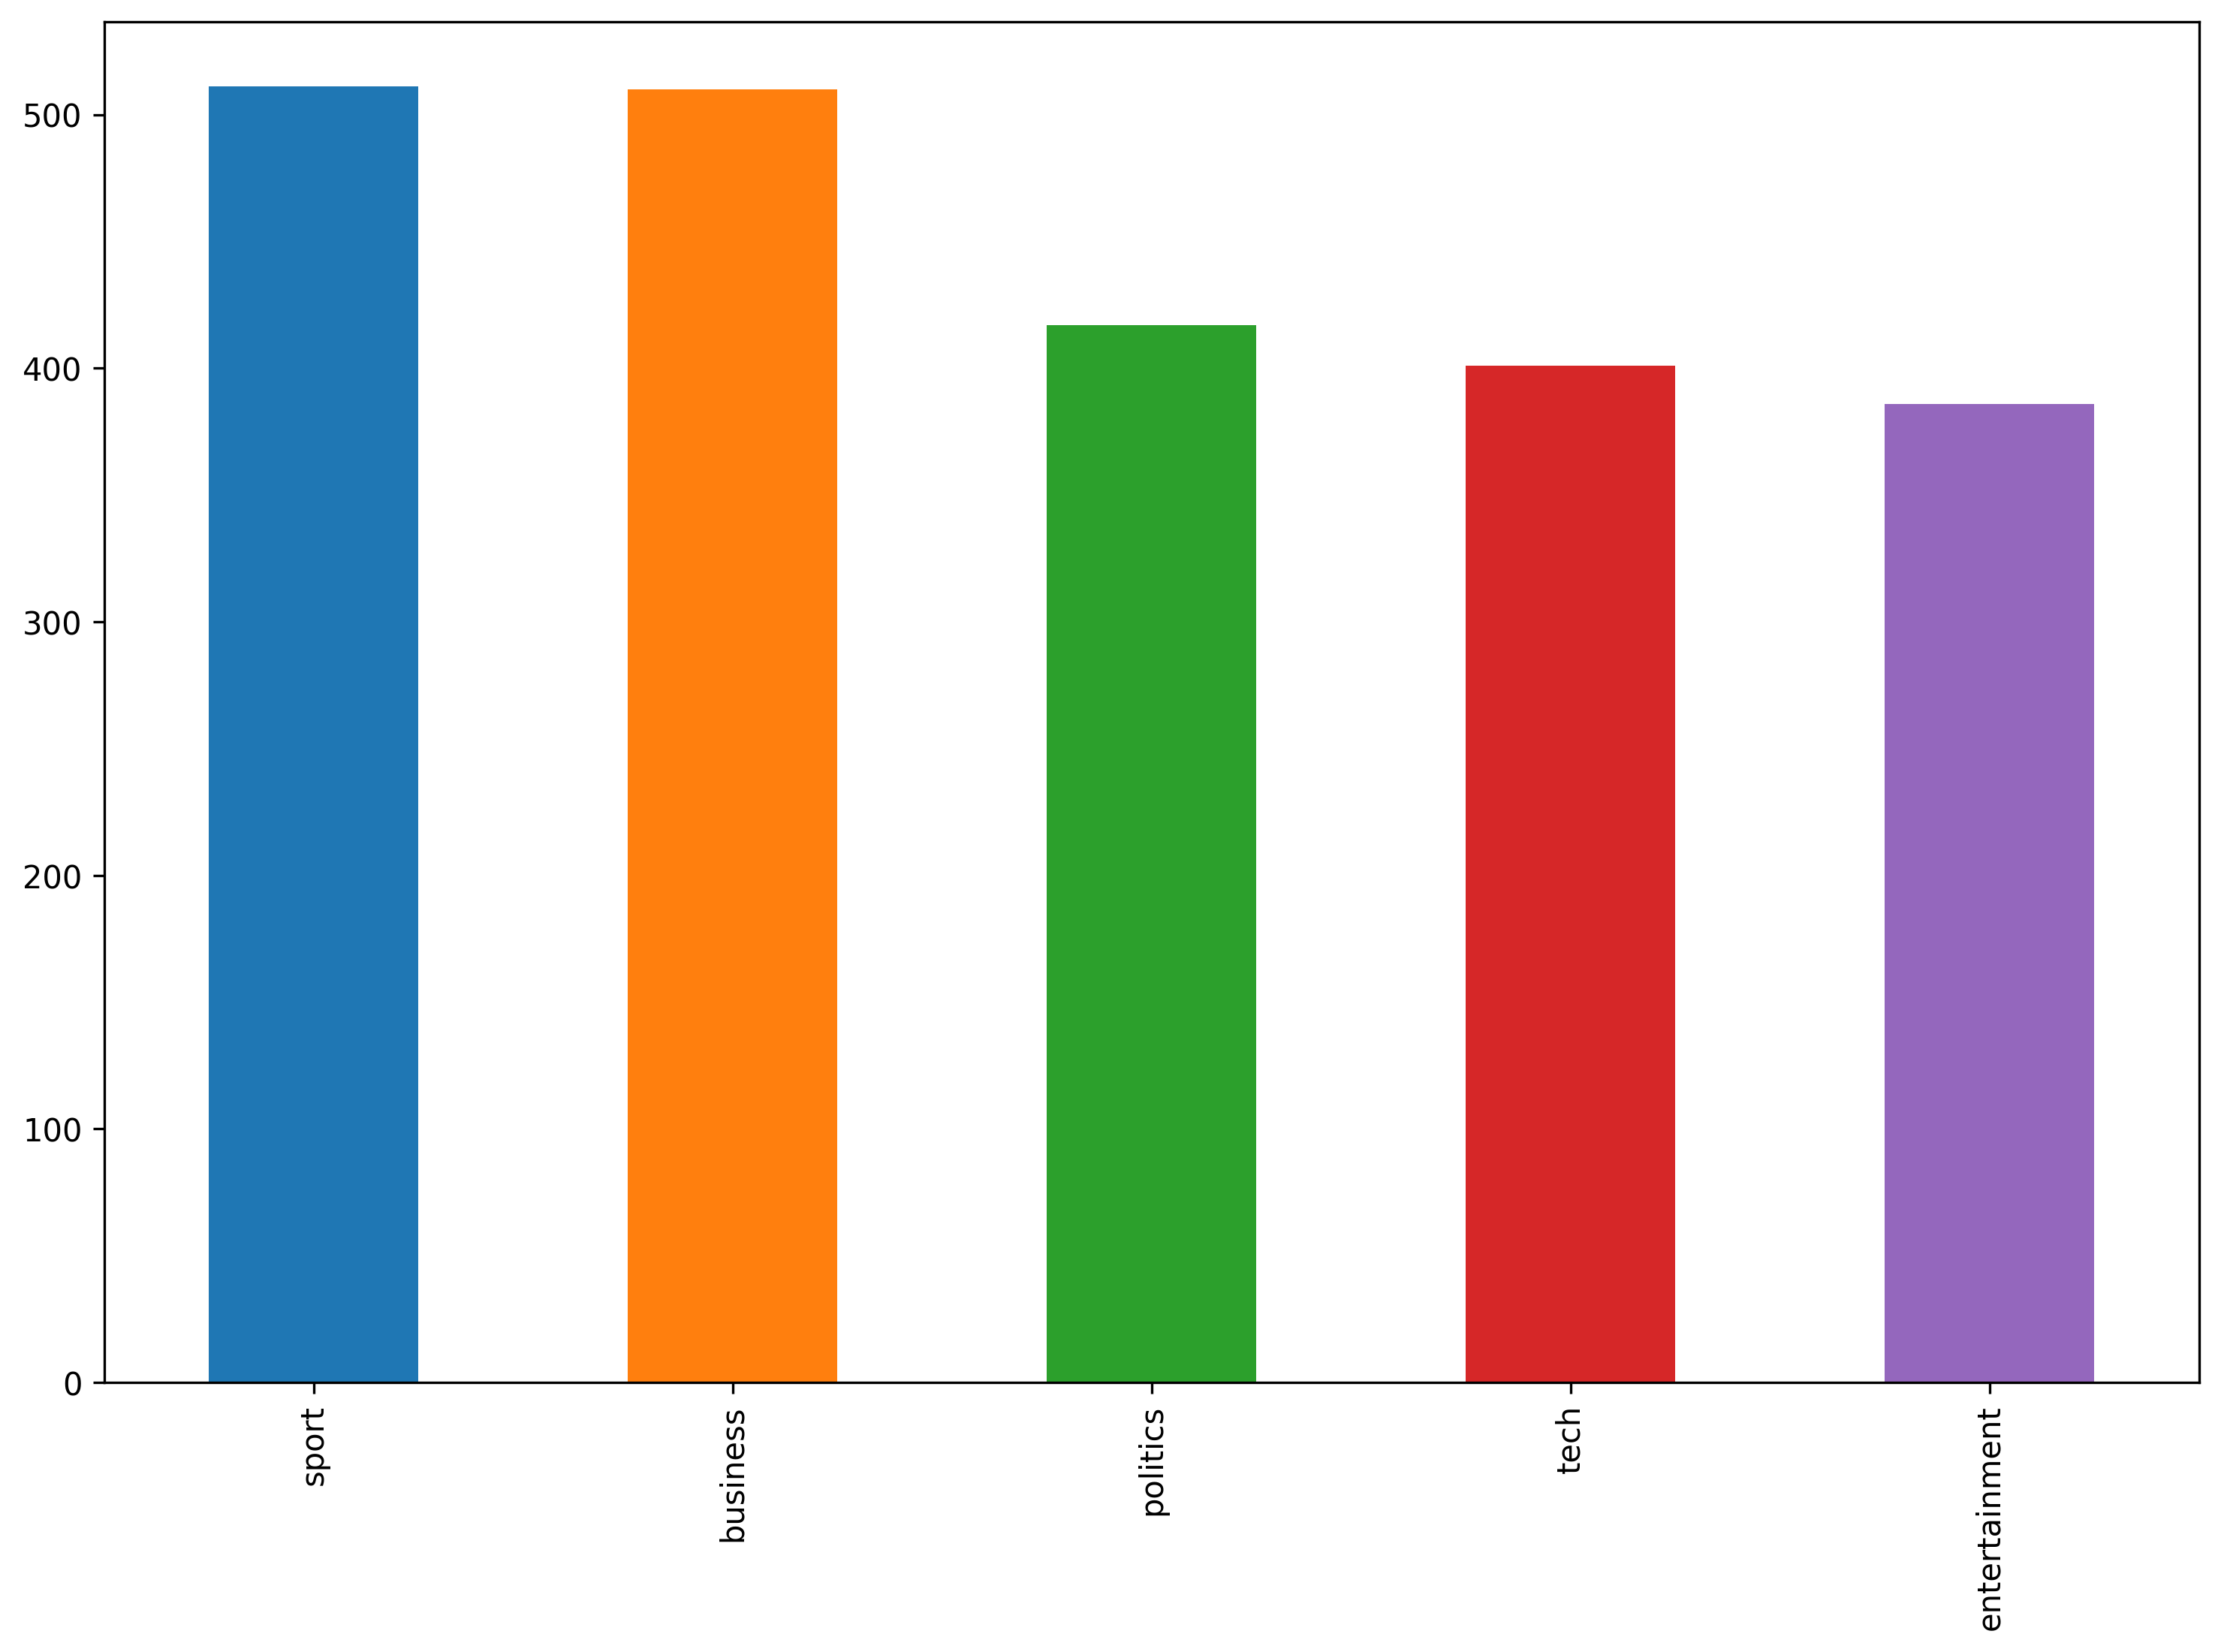

In [6]:
color = ['C0', 'C1', 'C2', 'C3', 'C4']

categories = data['category'].value_counts()
categories.plot(kind = 'bar', figsize = (12,8), color = color)

plt.show()

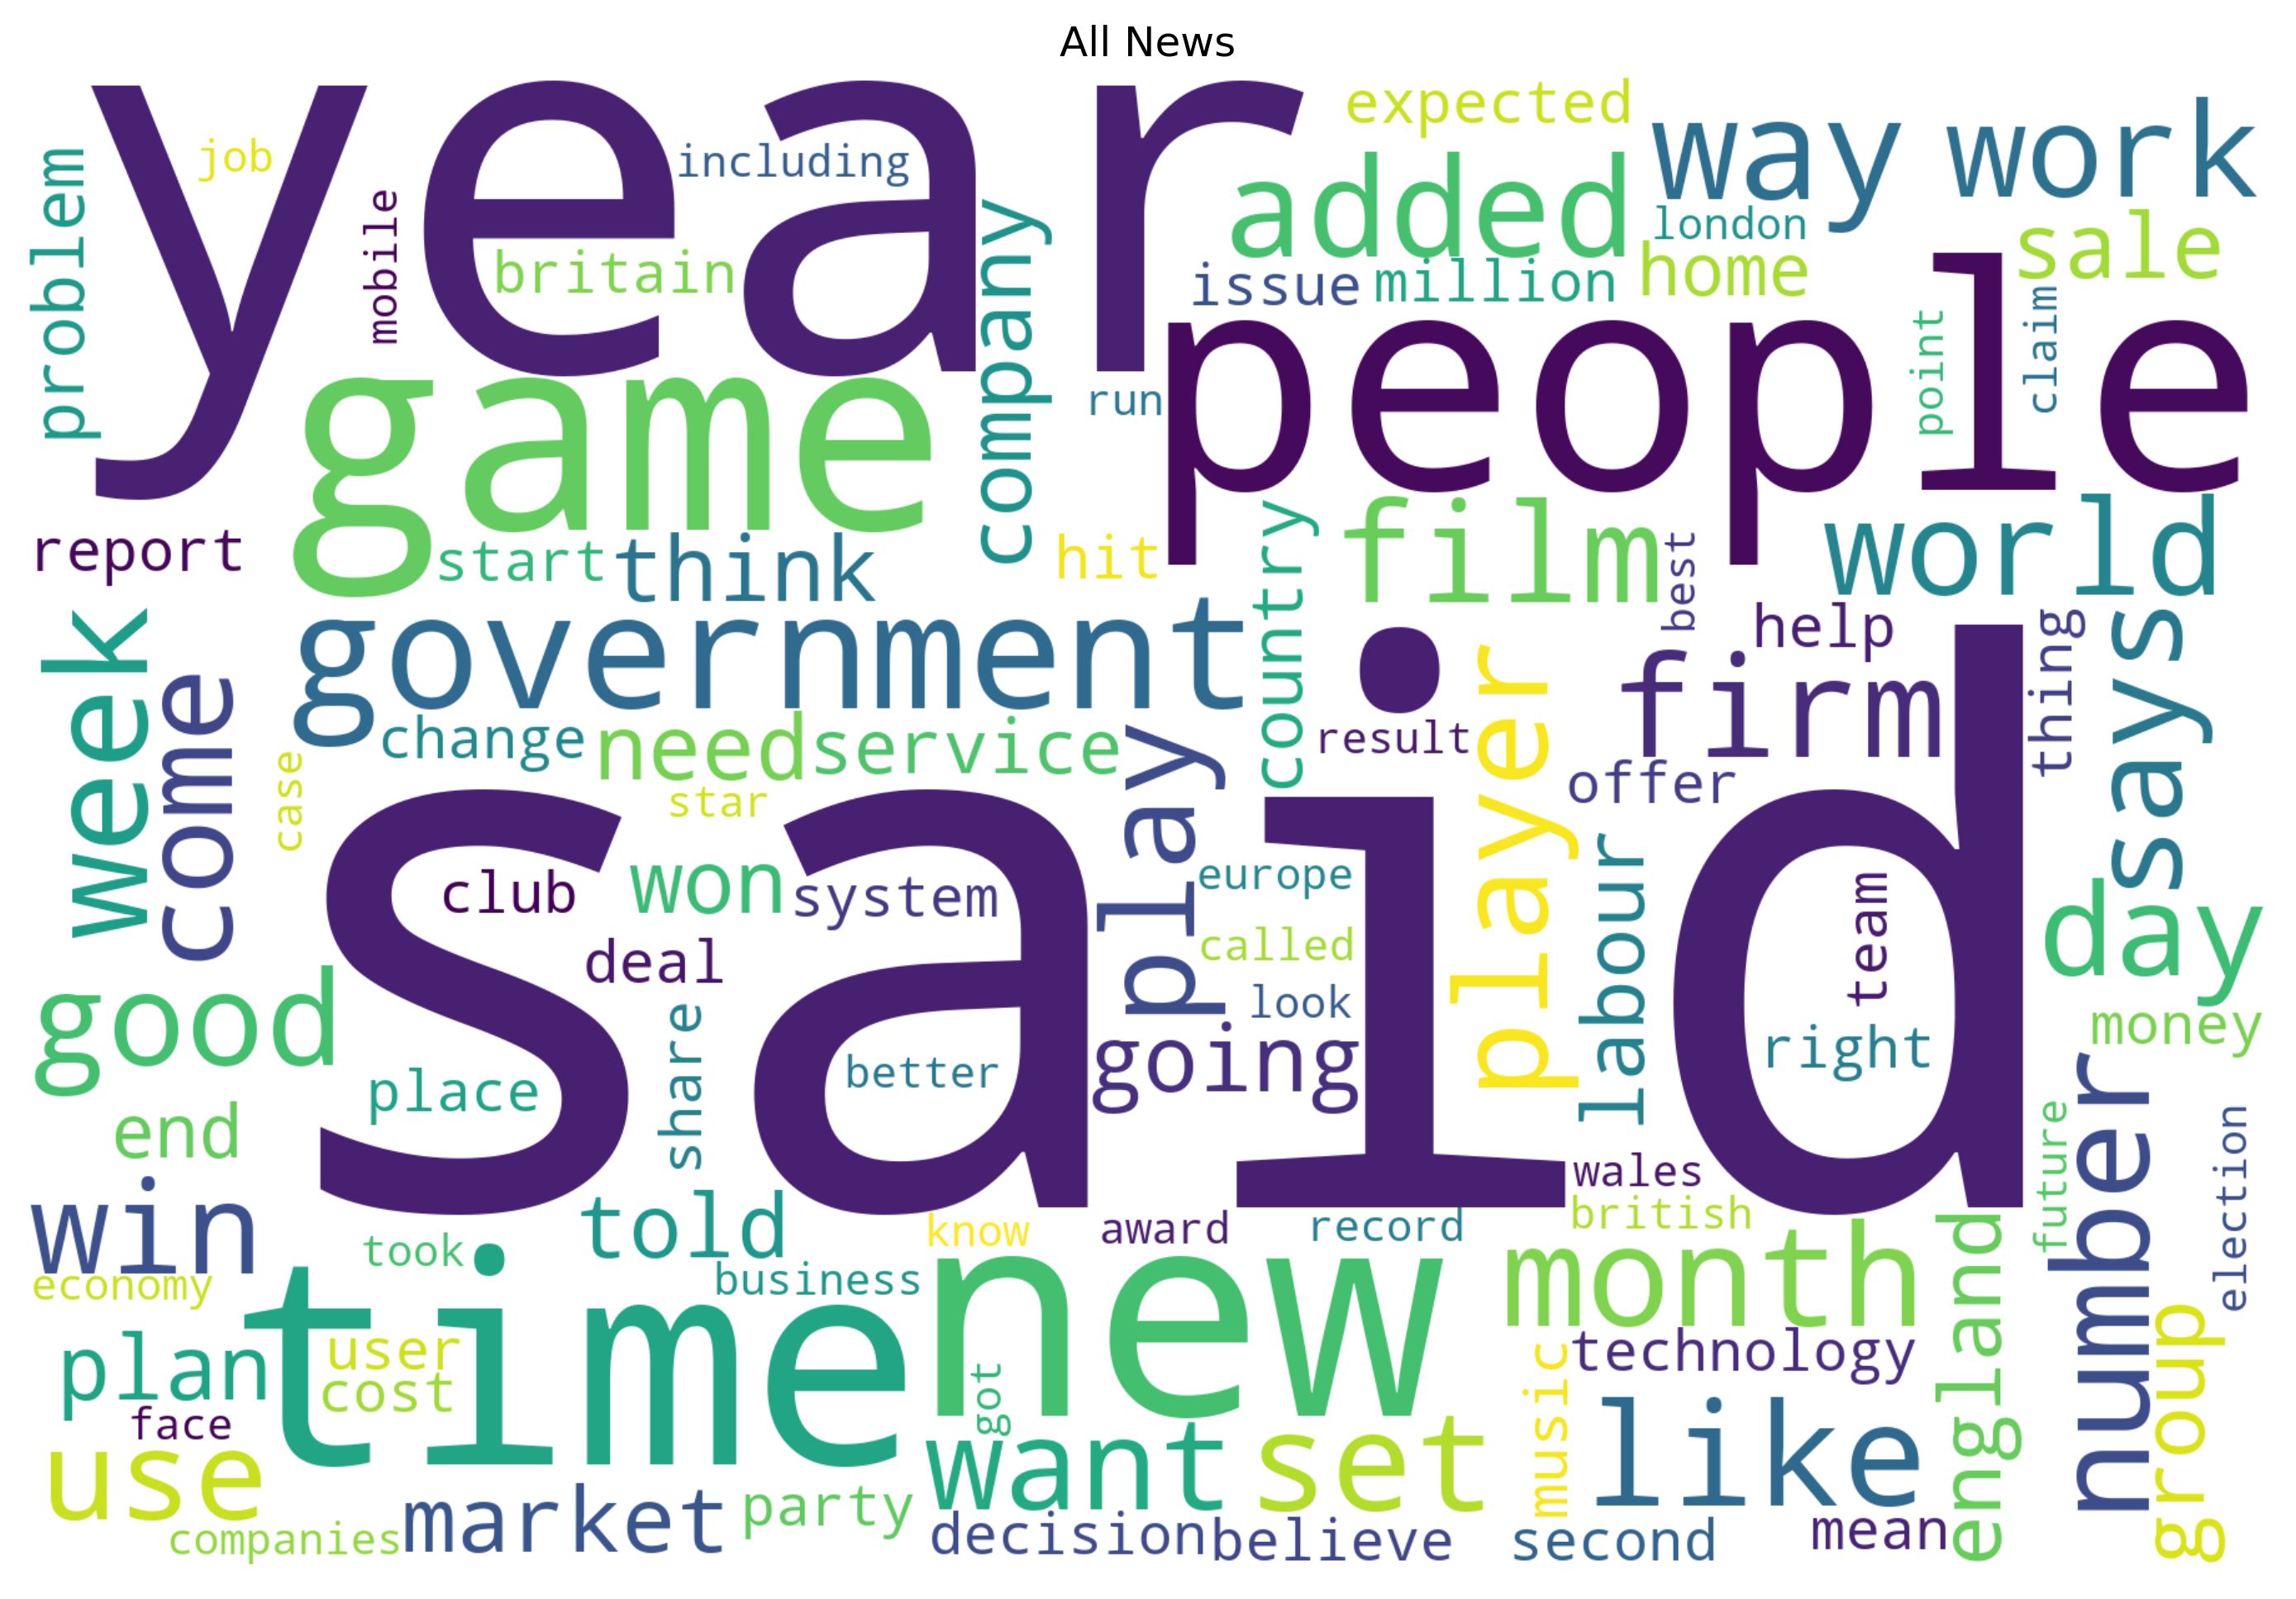

In [5]:
wc = WordCloud(width = 1800, height = 1200,
               random_state = 42, background_color = 'white',
               min_word_length = 3, max_words = 100,
               stopwords = STOP_WORDS)

text = ' '.join(data['text'].to_list())

wc_img = wc.generate(text)
#wc.to_file("blah.png")

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.title("All News")
plt.axis("off")

plt.show()

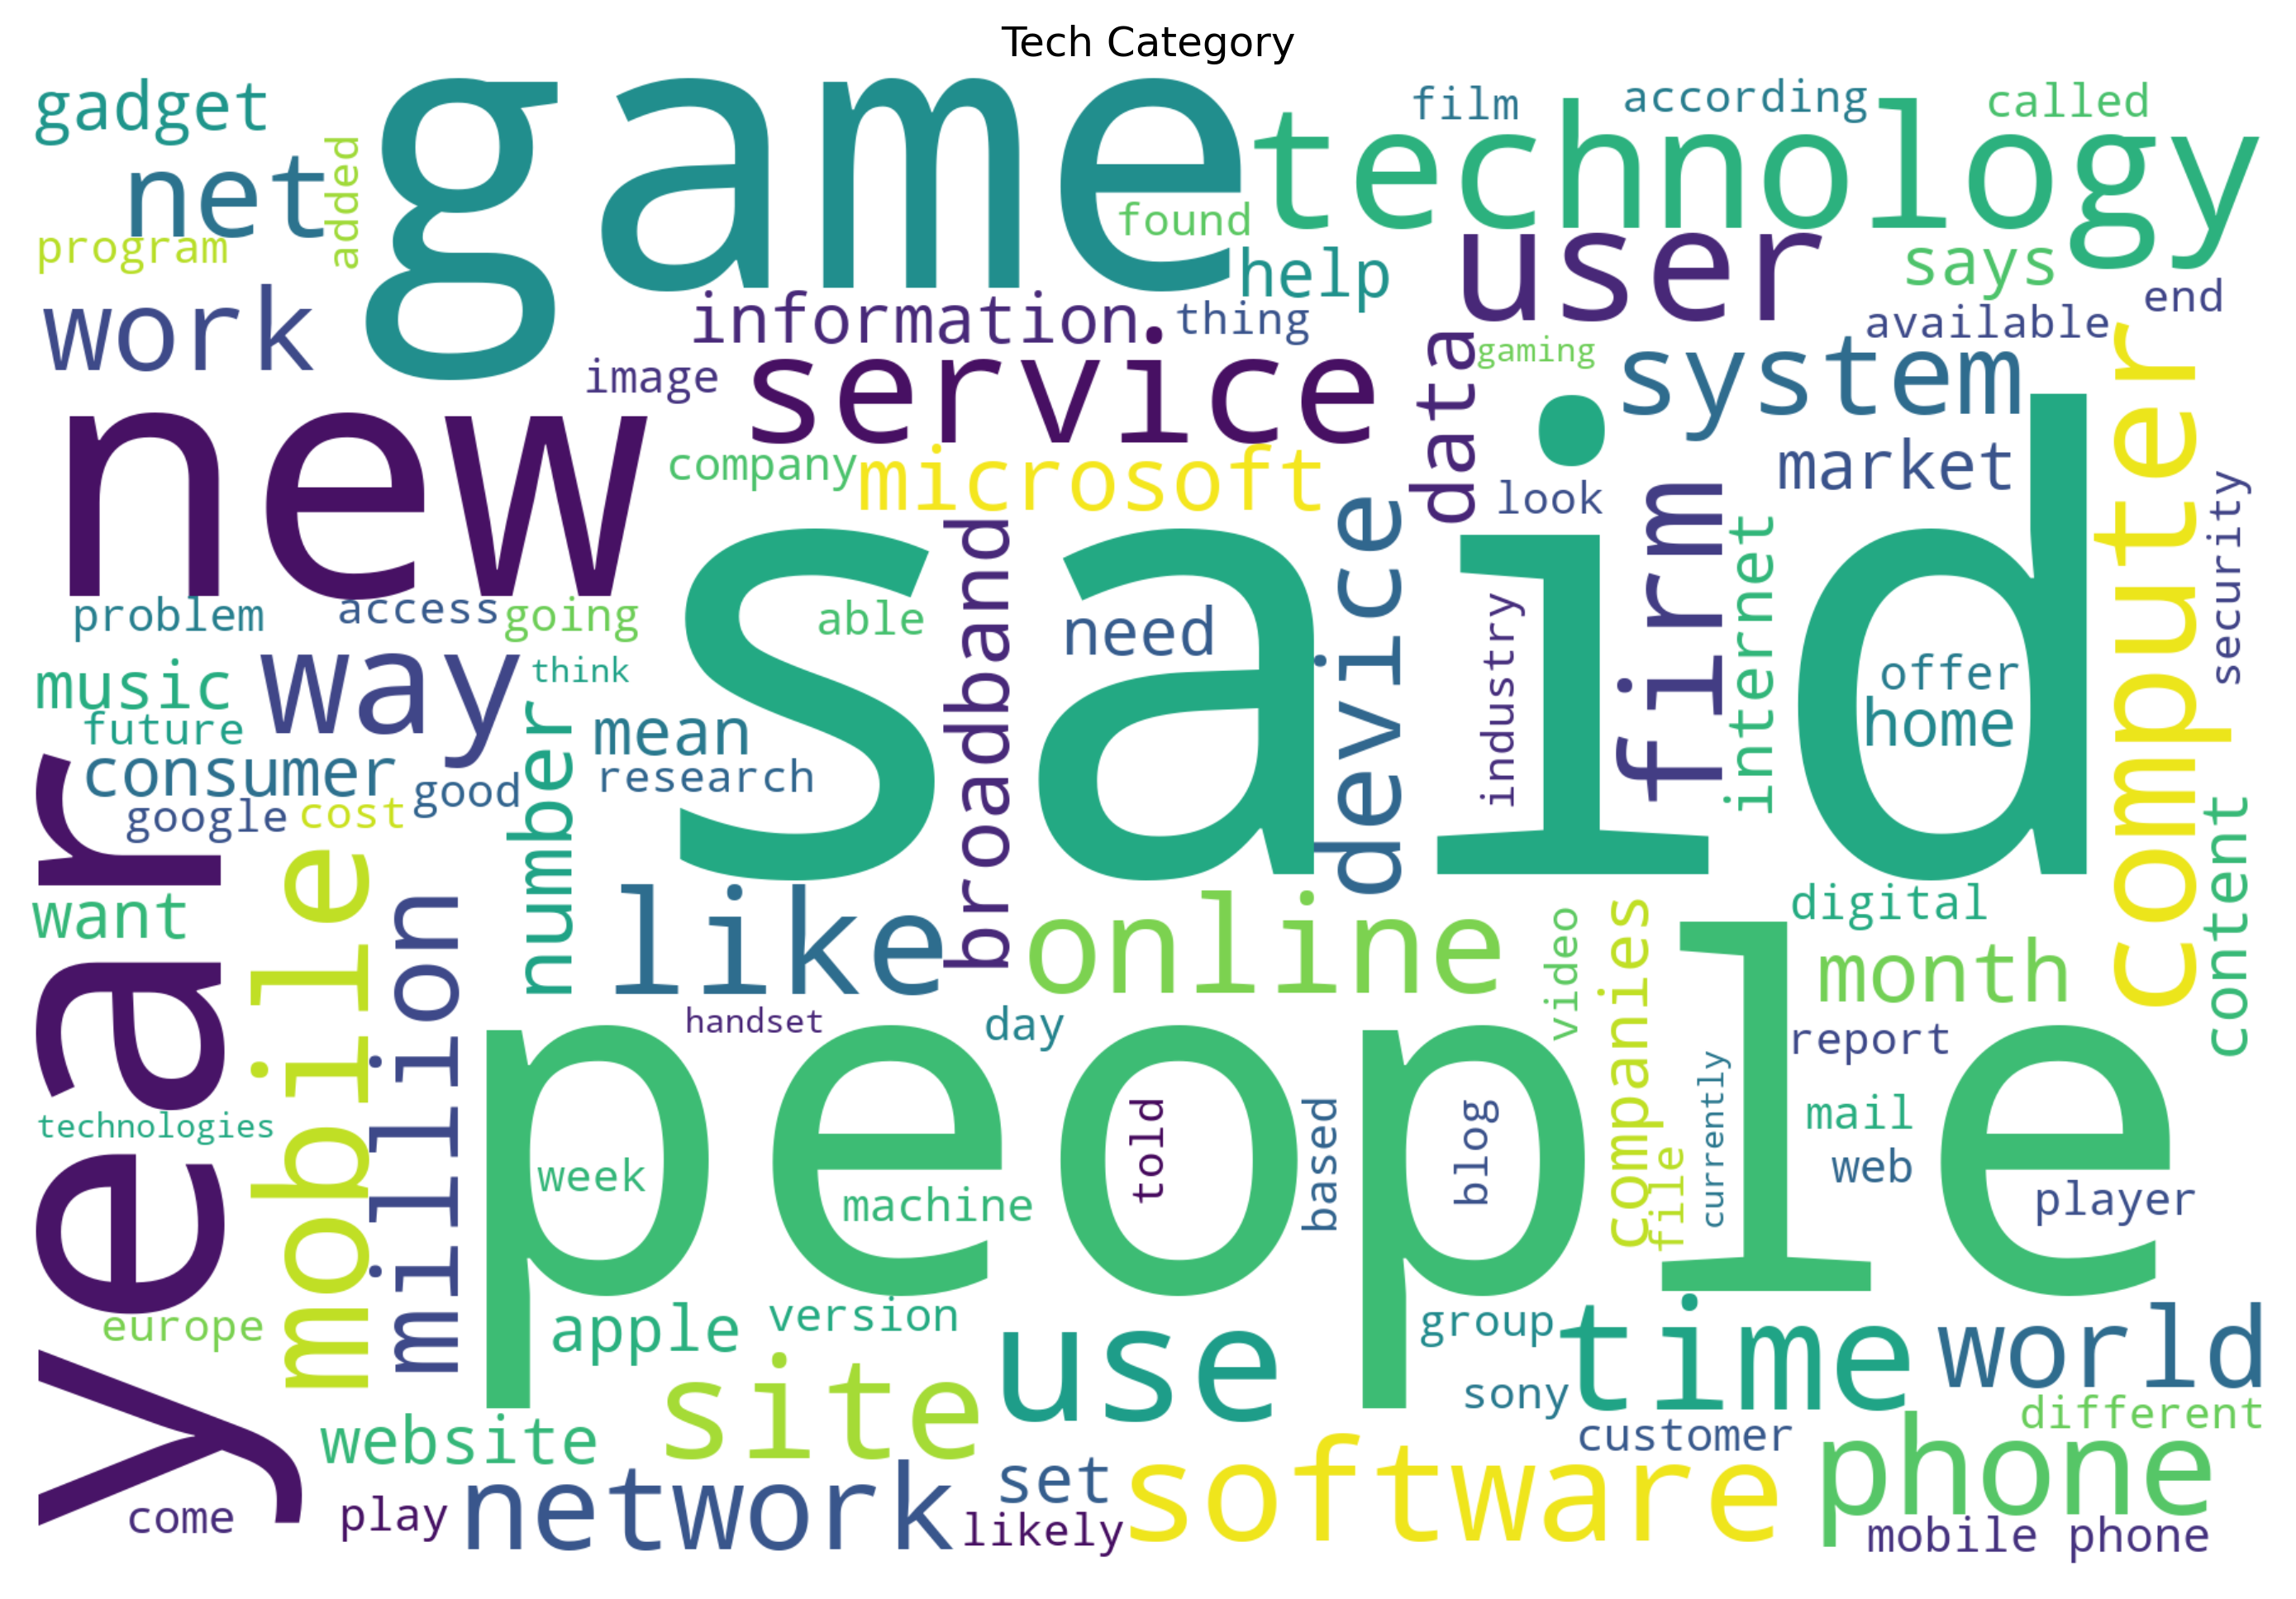

In [6]:
data_tech = data.query(" category == 'tech' ")['text']
text_tech = ' '.join(data_tech.to_list())

wc_img = wc.generate(text_tech)

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.title("Tech Category")
plt.axis("off")

plt.show()

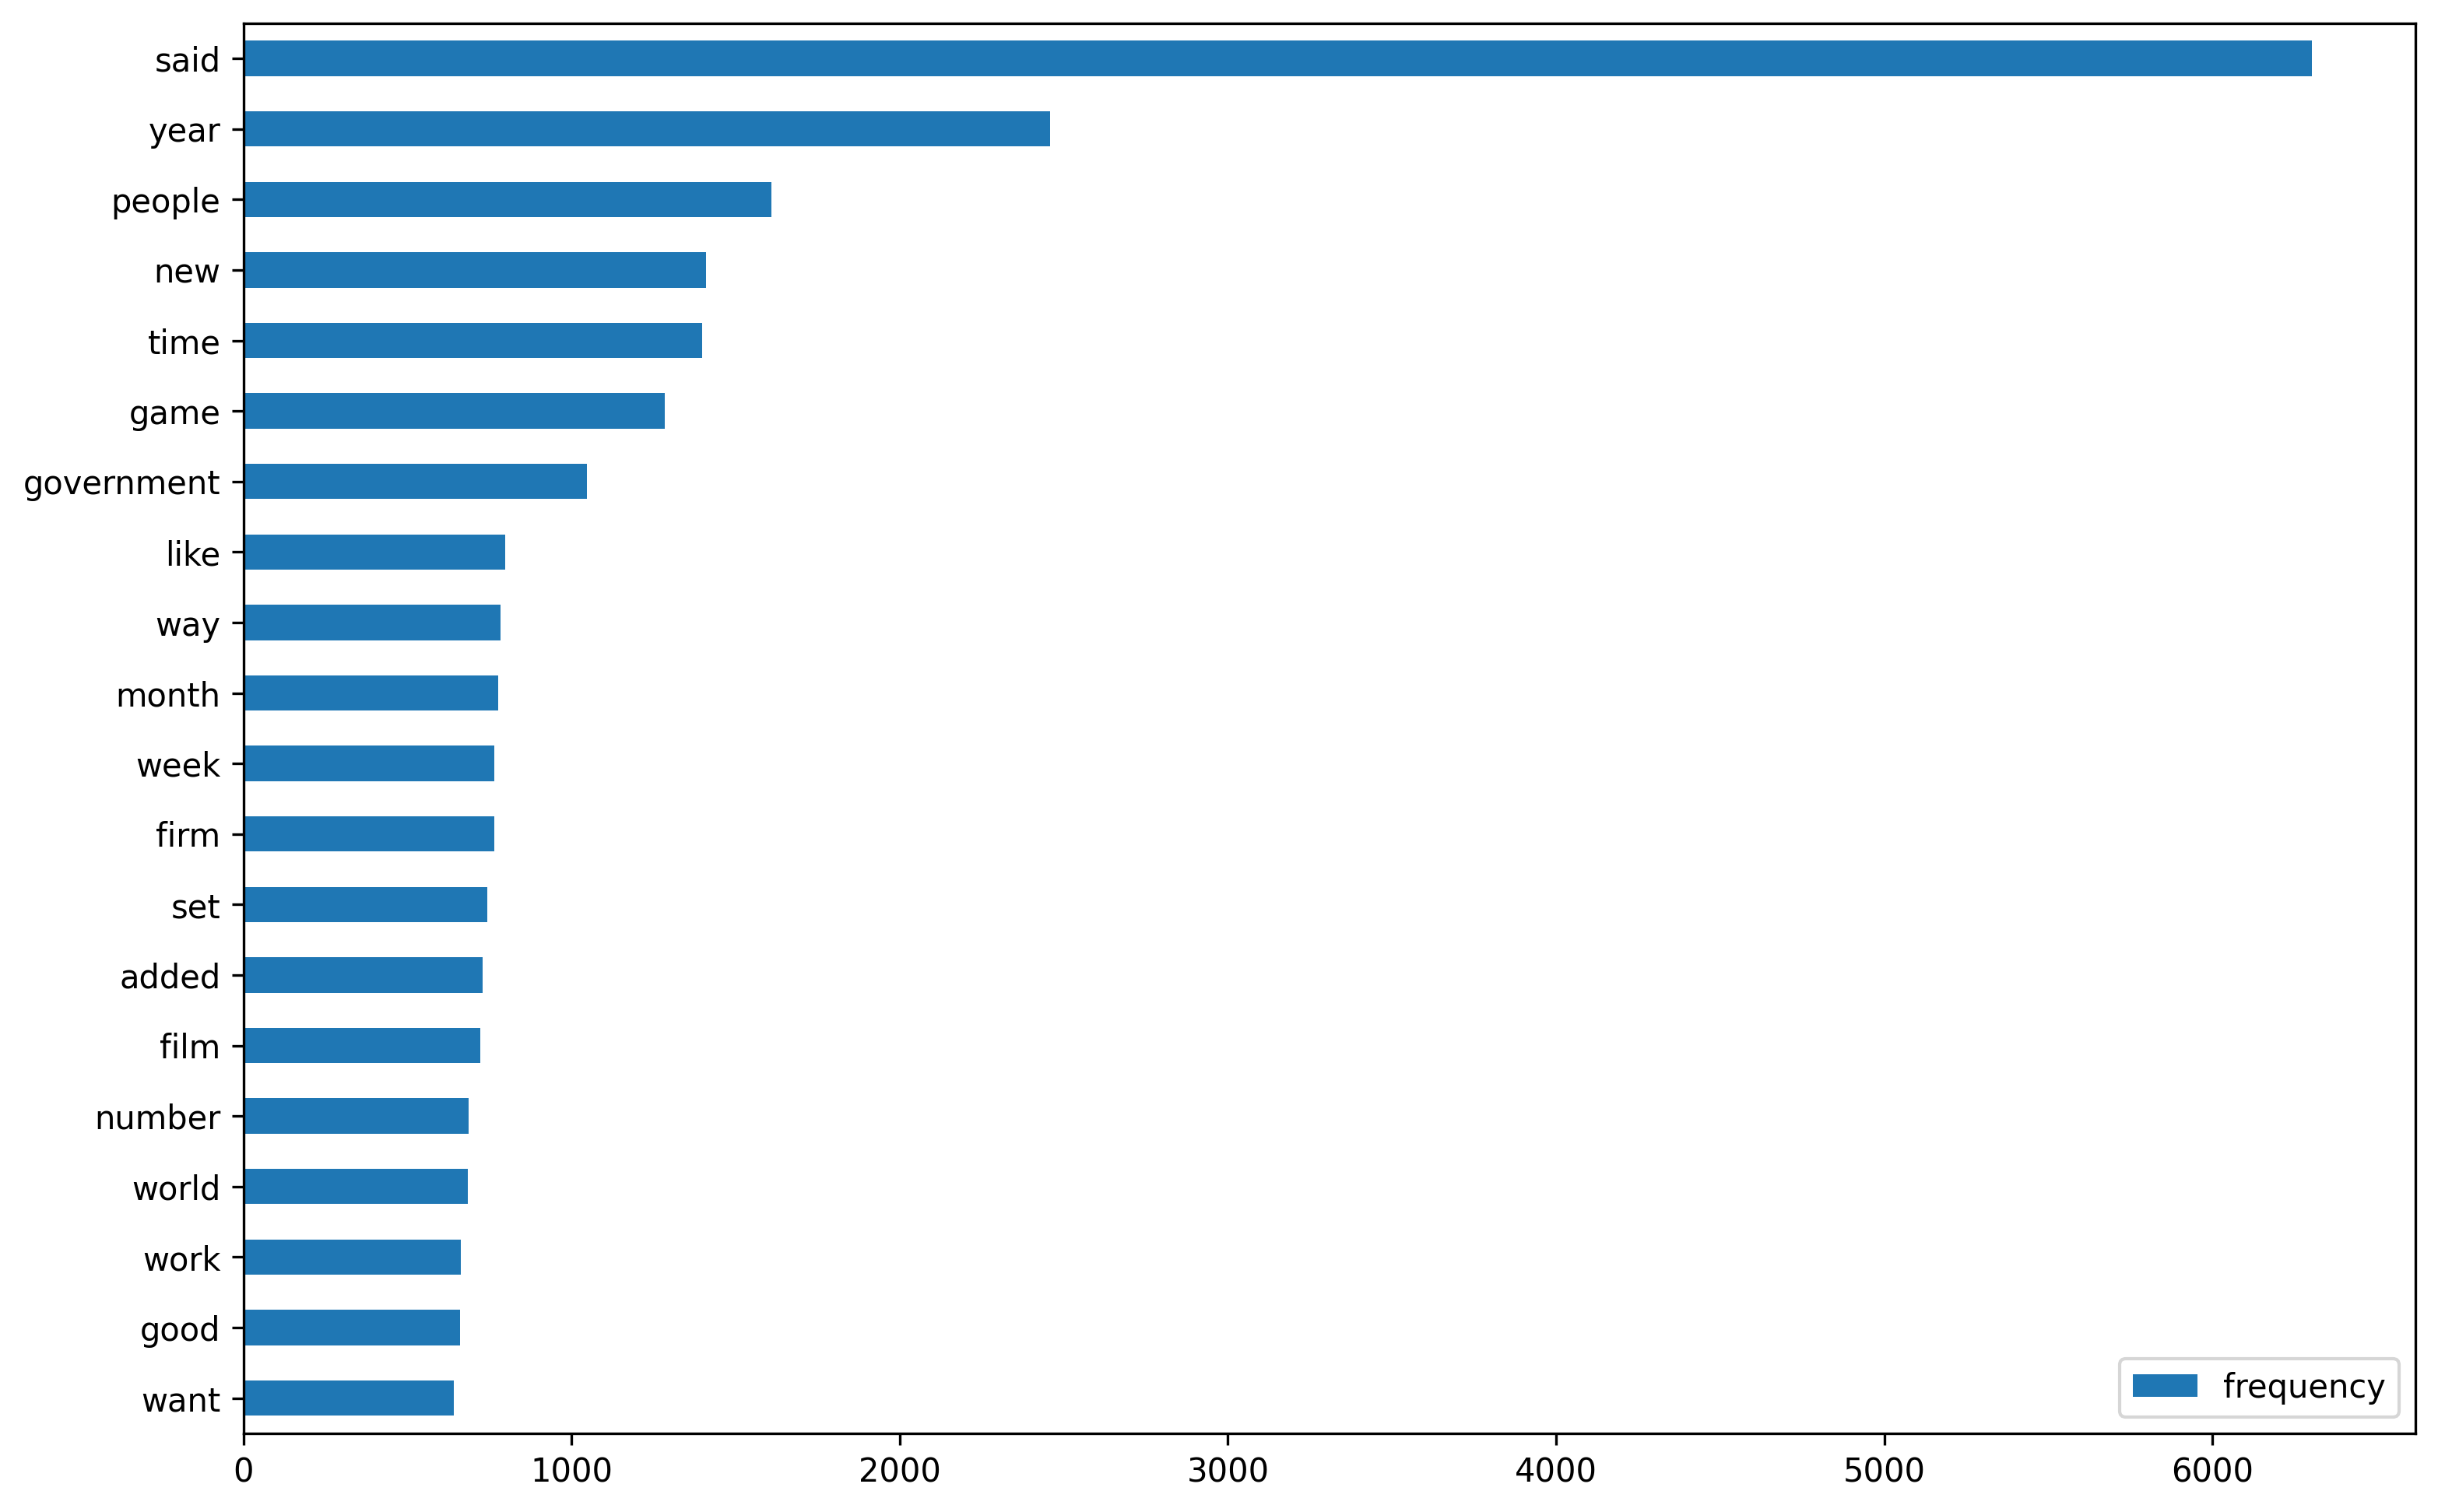

In [7]:
freq = wc.process_text(text)
df_freq = pd.DataFrame.from_dict(freq, orient='index', columns=['frequency'])

df_freq.sort_values('frequency')[-20:].plot(kind = 'barh', figsize = (12,8))

plt.show()

### Initializing the NLP Environment

In [8]:
nlp_ = nlp.setup(data = data, target='text', session_id = 6842)

Description,Value
session_id,6842
Documents,2225
Vocab Size,15625
Custom Stopwords,False


In [9]:
lda = nlp.create_model('lda', num_topics = 5)

In [10]:
data_assigned = nlp.assign_model(lda)

In [11]:
cols = ['Topic_0', 'Topic_1', 'Topic_2',
        'Topic_3', 'Topic_4', #'Topic_5', 
        'category']

data_assigned_ = data_assigned[cols]

data_assigned_

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,category
0,0.060324,0.831212,0.063175,0.011273,0.034016,tech
1,0.115085,0.039387,0.001271,0.464457,0.379799,business
2,0.584945,0.004143,0.001588,0.002269,0.407055,sport
3,0.876524,0.004787,0.001918,0.002714,0.114057,sport
4,0.237407,0.005586,0.677938,0.047968,0.031100,entertainment
...,...,...,...,...,...,...
2220,0.002727,0.417432,0.011253,0.542065,0.026524,business
2221,0.005706,0.005619,0.002303,0.003311,0.983062,politics
2222,0.404586,0.105269,0.359816,0.041914,0.088414,entertainment
2223,0.048826,0.058469,0.063179,0.000611,0.828914,politics


In [12]:
nlp.plot_model(model = lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.081379  0.169338       1        1  34.729973
1     -0.097756 -0.185512       2        1  24.971857
0     -0.259611  0.031456       3        1  21.216925
3      0.193827 -0.194324       4        1  11.748147
2      0.244919  0.179042       5        1   7.333098, topic_info=               Term         Freq        Total Category  logprob  loglift
389            film   937.000000   937.000000  Default  30.0000  30.0000
283            game  1288.000000  1288.000000  Default  29.0000  29.0000
184            year  2458.000000  2458.000000  Default  28.0000  28.0000
26          company   918.000000   918.000000  Default  27.0000  27.0000
626            sale   860.000000   860.000000  Default  26.0000  26.0000
54             firm   940.000000   940.000000  Default  25.0000  25.0000
718            rise   749.000000   749.000000  Default  24.0000  24.0000
873            good  1255.000000  1255.000000  Default  23.0000  23.0000
149            show   934.000000   934.000000  Default  22.0000  22.0000
174             use  1405.000000  1405.000000  Default  21.0000  21.0000
119            play  1006.000000  1006.000000  Default  20.0000  20.0000
114          people  2028.000000  2028.000000  Default  19.0000  19.0000
1397          award   358.000000   358.000000  Default  18.0000  18.0000
478      government   999.000000   999.000000  Default  17.0000  17.0000
889          player   847.000000   847.000000  Default  16.0000  16.0000
697         include   800.000000   800.000000  Default  15.0000  15.0000
94           market   562.000000   562.000000  Default  14.0000  14.0000
171              tv   418.000000   418.000000  Default  13.0000  13.0000
162      technology   552.000000   552.000000  Default  12.0000  12.0000
260           share   445.000000   445.000000  Default  11.0000  11.0000
1208            net   494.000000   494.000000  Default  10.0000  10.0000
7              also  2024.000000  2024.000000  Default   9.0000   9.0000
65              get  1335.000000  1335.000000  Default   8.0000   8.0000
540             win   672.000000   672.000000  Default   7.0000   7.0000
160            take  1617.000000  1617.000000  Default   6.0000   6.0000
414            star   288.000000   288.000000  Default   5.0000   5.0000
797           price   367.000000   367.000000  Default   4.0000   4.0000
218          expect   709.000000   709.000000  Default   3.0000   3.0000
741            fall   500.000000   500.000000  Default   2.0000   2.0000
753          profit   287.000000   287.000000  Default   1.0000   1.0000
496           party   541.387647   542.155852   Topic1  -5.3679   1.0561
485          labour   450.614639   451.379052   Topic1  -5.5514   1.0559
468        election   401.245324   402.012005   Topic1  -5.6675   1.0557
503          policy   330.040768   330.812637   Topic1  -5.8628   1.0552
535            tory   321.414828   322.177990   Topic1  -5.8893   1.0552
509        proposal   241.855761   242.630789   Topic1  -6.1737   1.0544
527        spending   241.167633   241.979419   Topic1  -6.1765   1.0542
194           argue   220.516651   221.291724   Topic1  -6.2661   1.0541
711          police   217.536789   218.308585   Topic1  -6.2797   1.0540
826    conservative   196.496001   197.261432   Topic1  -6.3814   1.0537
505       political   186.413926   187.187737   Topic1  -6.4341   1.0534
3150       prisoner   196.971090   197.833910   Topic1  -6.3790   1.0532
504         politic   158.749542   159.525141   Topic1  -6.5947   1.0527
1490        propose   154.313924   155.093879   Topic1  -6.6230   1.0525
2820       argument   149.036288   149.813441   Topic1  -6.6578   1.0524
791        minister   140.912356   141.680364   Topic1  -6.7139   1.0521
311       situation   144.706264   145.501177   Topic1  -6.6873   1.0521
2218         reform   136.243038   137.010745   Topic1  -6.7476   1.0519
95

In [13]:
classf = classification.setup(data_assigned_, target = 'category',
                              session_id = 3100, fix_imbalance = True,
                              train_size = 0.8)

,Description,Value
0,session_id,3100
1,Target,category
2,Target Type,Multiclass
3,Label Encoded,"business: 0, entertainment: 1, politics: 2, sport: 3, tech: 4"
4,Original Data,"(2225, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9079,0.9905,0.9074,0.9131,0.9084,0.8844,0.8855,2.4800
rf,Random Forest Classifier,0.9073,0.9891,0.9069,0.9125,0.9080,0.8837,0.8847,0.1200
lightgbm,Light Gradient Boosting Machine,0.9034,0.9882,0.9033,0.9087,0.9040,0.8788,0.8798,0.2400
et,Extra Trees Classifier,0.9000,0.9885,0.8997,0.9048,0.9005,0.8746,0.8755,0.1050
gbc,Gradient Boosting Classifier,0.8983,0.9893,0.8982,0.9032,0.8986,0.8725,0.8735,0.2130
xgboost,Extreme Gradient Boosting,0.8955,0.9880,0.8953,0.9003,0.8959,0.8690,0.8700,0.3140
qda,Quadratic Discriminant Analysis,0.8893,0.9814,0.8873,0.8963,0.8897,0.8611,0.8627,0.0070
svm,SVM - Linear Kernel,0.8848,0.0000,0.8829,0.8888,0.8845,0.8555,0.8566,0.0190
lr,Logistic Regression,0.8837,0.9875,0.8824,0.8875,0.8835,0.8541,0.8551,0.3800
knn,K Neighbors Classifier,0.8820,0.9716,0.8791,0.8900,0.8828,0.8519,0.8535,0.1350
